In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
from tensorflow import keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

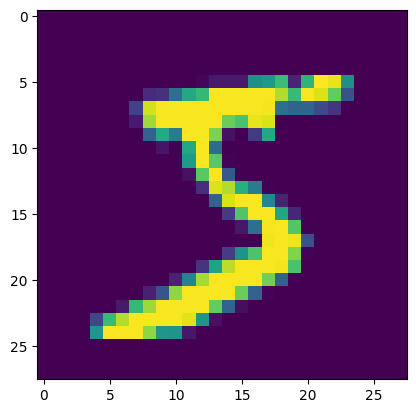

In [14]:
plt.imshow(X_train[0])

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [18]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<img src='./digits_nn.jpg'>

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 27s 12ms/step - loss: 0.4704 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2666 - accuracy: 0.9256


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.2686 - accuracy: 0.9252


[0.26859432458877563, 0.9251999855041504]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 3s 7ms/step


array([2.5882427e-02, 4.3115637e-07, 5.1658582e-02, 9.4886410e-01,
       2.4832806e-03, 1.1337347e-01, 1.0714566e-06, 9.9983704e-01,
       8.8483103e-02, 6.8825328e-01], dtype=float32)

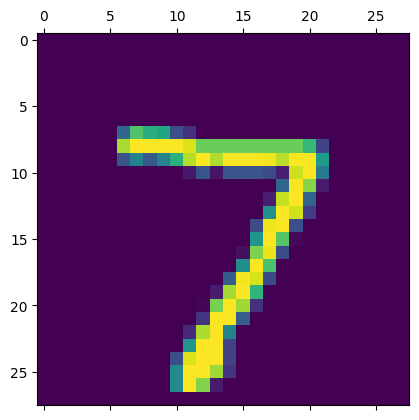

In [24]:
plt.matshow(X_test[0])

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[5]

1

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

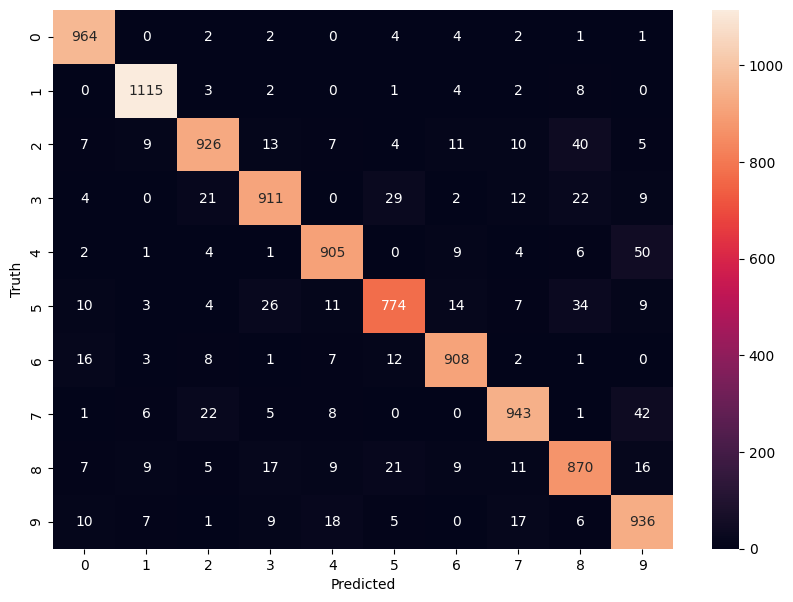

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth");plt.show()


In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 65s 28ms/step - loss: 0.2738 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1237 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0867 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0523 - accuracy: 0.9840


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 8s 16ms/step - loss: 0.0800 - accuracy: 0.9764


[0.08001592755317688, 0.9764000177383423]

313/313 [==============================] - 6s 18ms/step


Text(95.72222222222221, 0.5, 'Truth')

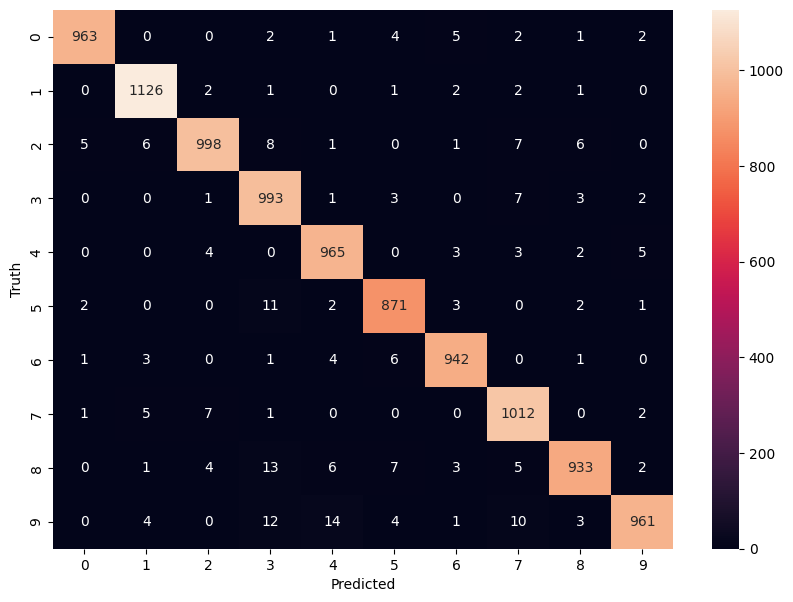

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 84s 33ms/step - loss: 0.2774 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1284 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0900 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0682 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0534 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 10/10
313/313 [==============================] - 9s 22ms/s

[0.0833202600479126, 0.9768000245094299]

# CNN

In [38]:
from tensorflow.keras import layers, models
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 269s 134ms/step - loss: 0.1567 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 234s 125ms/step - loss: 0.0529 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 224s 120ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0166 - accuracy: 0.9948


In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 33ms/step - loss: 0.0425 - accuracy: 0.9868


[0.042502522468566895, 0.9868000149726868]